# Module 2: kNN example

In this notebook, we will use the kNN implementation of `scikit-learn`, `KNeighborsClassifier`, to classify the instances in the Iris flower dataset.

Let's import the classes we need:

In [ ]:
# Import packages
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [ ]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100, 4)
xtest shape:  (50, 4)
ytest shape:  (50, 4)


Great, data seems correct.

We will now create the classifier. In this notebook, we will use the `KNeighborsClassifier` implementation available in `scikit-learn`. There are different parameters we can adjust to try to improve the model performance:

```
n_neighbors: int, default=5
Number of neighbors to use by default for kneighbors queries.

weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

...

algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.

...

p: int, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric: str or callable, default=’minkowski’
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of DistanceMetric for a list of available metrics. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.
```

For this example, we'll choose `n_neighbors=15` and keep `p=2`, that is, the Euclidean distance.

In [ ]:
# Init the Classifier
model = KNeighborsClassifier(n_neighbors=15)

We can now train the model:

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

And once trained, predict the labels for the test set:

In [ ]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives.

Text(89.18, 0.5, 'Predicted')

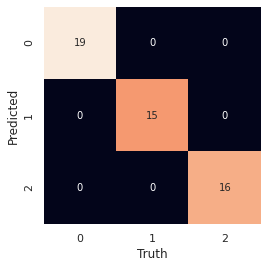

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

As you can see, the model behaves perfectly.

We can also compute the most common classification metrics with the help of `sklearn.metrics.classification_report`. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical slides or access the <a hred="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">documentation</a>.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In this case, even though `kNN` is not a probabilistic algorithm, we can still obtain some probability estimates with `predict_proba`. To obtain these estimates, it computes a sort of probability of belonging to each class by taking the fraction between the elements of the chosen class and the total number of instances.


In [ ]:
preds_proba = model.predict_proba(xtest)
print(preds_proba[:10, :])

[[0.         0.86666667 0.13333333]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.86666667 0.13333333]
 [0.         0.73333333 0.26666667]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.13333333 0.86666667]
 [0.         0.8        0.2       ]
 [0.         1.         0.        ]]


These results are for the 10 first samples and `n_neighbors=15`. The first column shows the probability of belonging to the first class, the second one to the second class and the third column to the third class.

You are welcomed to try with different values and visualize the probabilities. Note that the probabilities vary as the value of `n_neighbors` increases, since it affects the number of instances assigned to each class.

Finally, we can also graphically show the decision boundaries for the 3 classes. However, since we will visualize them in 2 dimensions, we'll need to re-train the algorithm with just 2 of the 4 available variables. For this example, we'll take the first 2, but feel free to try with any other combination!

(3.3, 8.880000000000006, 1.0, 5.380000000000004)

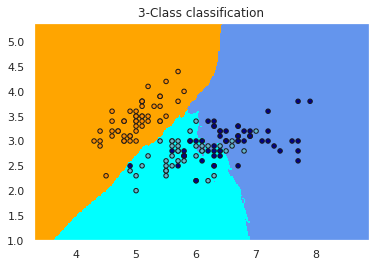

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris.data[:, :2]
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Train the model 
model.fit(xtrain[:, :2], ytrain) # to visualize in 2-dim, we can only take 2 variables
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')